<a href="https://colab.research.google.com/github/fralfaro/MAT281_2022/blob/main/labs/lab_06/lab_06.ipynb
" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorios N°06

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  #importamos statsmodels para la regresion lineal
from sklearn.metrics import r2_score

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_06/data/anscombe.csv")

df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

In [3]:
#creamos un dataframe para cada grupo
df_1 = df.loc[lambda x: x['grupo'] == "Grupo_1"]
df_2 = df.loc[lambda x: x['grupo'] == "Grupo_2"]
df_3 = df.loc[lambda x: x['grupo'] == "Grupo_3"]
df_4 = df.loc[lambda x: x['grupo'] == "Grupo_4"]

df_4.head()

,x,y,grupo
33,8,6.58,Grupo_4
34,8,5.76,Grupo_4
35,8,7.71,Grupo_4
36,8,8.84,Grupo_4
37,8,8.47,Grupo_4


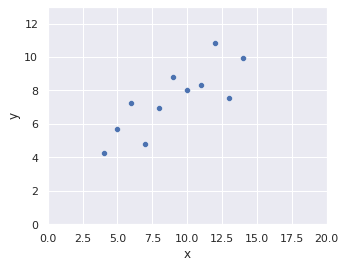

In [4]:
#gráfico grupo 1
sns.set(rc={'figure.figsize':(5,4)})

gfg = sns.scatterplot(
        x='x',
        y='y',
        data=df_1,
    
)
gfg.set_xlim(0,20)
gfg.set_ylim(0,13)
plt.show()

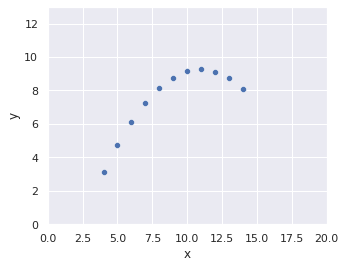

In [5]:
#gráfico grupo 2
gfg = sns.scatterplot(
        x='x',
        y='y',
        data=df_2,
    
)
gfg.set_xlim(0,20)
gfg.set_ylim(0,13)
plt.show()

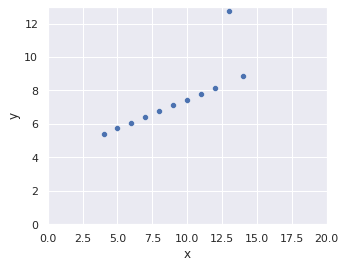

In [6]:
#gráfico grupo 3
gfg = sns.scatterplot(
        x='x',
        y='y',
        data=df_3,
    
)
gfg.set_xlim(0,20)
gfg.set_ylim(0,13)
plt.show()

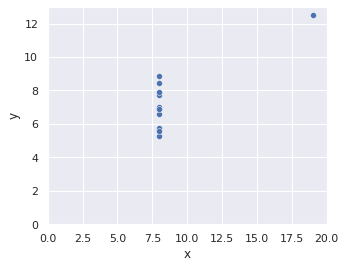

In [7]:
#grafico grupo 4
gfg = sns.scatterplot(
        x='x',
        y='y',
        data=df_4,
    
)
gfg.set_xlim(0,20)
gfg.set_ylim(0,13)
plt.show()

**1.** A simple vista los gráficos son muy distintos entre sí, y se esperaría que fueran modelados por ajustes distintos para cada uno. 

In [8]:
a = df_1.describe()
b = df_2.describe()
c = df_3.describe()
d = df_4.describe()
print("Estadísticas del grupo 1:\n", a)
print("Estadísticas del grupo 2:\n", b)
print("Estadísticas del grupo 3:\n", c)
print("Estadísticas del grupo 4:\n", d)

Estadísticas del grupo 1:
                x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000
Estadísticas del grupo 2:
                x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000
Estadísticas del grupo 3:
                x          y
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030424
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.740000
Estadísticas del grupo 4:
                x          y
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.030579
min     8.000000   5.250

**2.** Podemos notar que a pesar de que a la vista los datos parecían completamente distintos, sí comparten algunas estadísticas como el promedio y desviación estándarde x y de y. Sin embargo, la distribución por cuantiles de y sí es muy diferente en los distintos grupos.

Nota: en la parte siguiente solo se graficará el ajuste lineal para cada grupo. El modelo en sí obtenido a partir de statsmodels estará en la parte 4 junto a las métricas para el error.

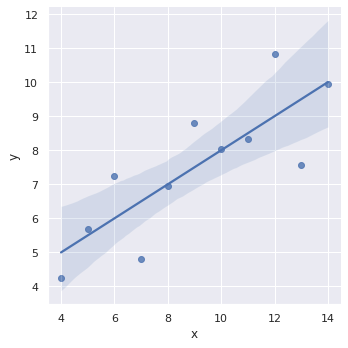

In [9]:
gfg = sns.lmplot(
    x='x',
    y='y',
    data=df_1
) 
plt.show()


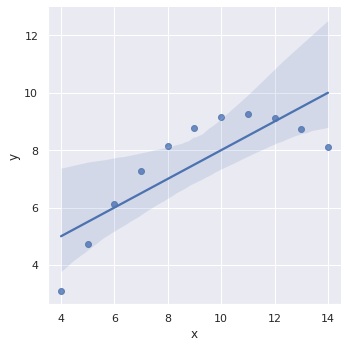

In [10]:
gfg = sns.lmplot(
    x='x',
    y='y',
    data=df_2
) 
plt.show()

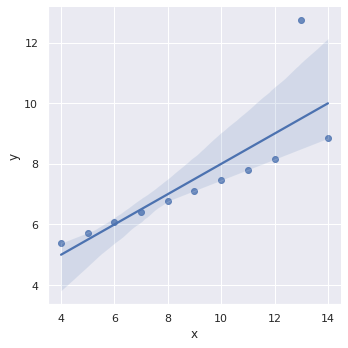

In [11]:
gfg = sns.lmplot(
    x='x',
    y='y',
    data=df_3
) 
plt.show()

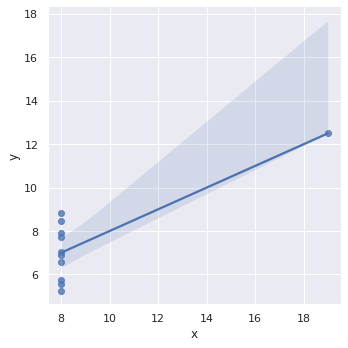

In [12]:
gfg = sns.lmplot(
    x='x',
    y='y',
    data=df_4
) 
plt.show()

**3.** Podemos ver que todos los grupos presentaron el mismo ajuste lineal. Esto se debe a que este se calcula solo en base al promedio y desviación estándar de las variables x e y, que vimos que eran prácticamente iguales, por lo que dependiendo de la distribución por cuantiles de x e y (o equivalentemente de los errores) podría no ser un modelo correcto. 

In [13]:
#codigo obtenido desde metrics.py en la pagina del curso
def mae(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute error (MAE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.abs(error).mean(), 4)

def rmse(targets, predictions) -> float:
    """
    Calculo de la metrica: root mean squared error (RMSE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    return round(np.sqrt((error ** 2).mean()), 4)

def mape(targets, predictions) -> float:
    """
    Calculo de la metrica: mean absolute percentage error (MAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets

    if any(x == 0 for x in targets):
        return np.inf
    else:
        return round(np.abs(error / targets).mean(),4)

def wmape(targets, predictions) -> float:
    """
    Calculo de la metrica:  weighted mean absolute percentage error (WMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.sum(targets)

    if sum_values == 0:
        return np.inf
    else:
        return round(np.abs(error).sum() / sum_values,4)

def smape(targets, predictions) -> float:
    """
    Calculo de la metrica: symmetric mean absolute percentage error (SMAPE)
    :param targets: valor real
    :param predictions: valor estimado
    :return: valor de la metrica
    """
    error = predictions - targets
    sum_values = np.abs(predictions) + np.abs(targets)

    if any(x == 0 for x in sum_values):
        return np.inf

    else:
        return round(2 * np.mean(np.abs(error) / sum_values),4)
def summary_metrics(df) -> pd.DataFrame:
    """
    Aplicar las distintas metricas definidas
    :param df:  dataframe con las columnas: ['y','yhat']
    :return: dataframe con las metricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mae(y_true, y_pred), 4)]
    df_result['rmse'] = [round(rmse(y_true, y_pred), 4)]

    df_result['mape'] = [round(mape(y_true, y_pred), 4)]
    df_result['wmape'] = [round(wmape(y_true, y_pred), 4)]
    df_result['smape'] = [round(smape(y_true, y_pred), 4)]

    df_result["r2_score"] = [round(r2_score(y_true, y_pred),4)]

    # nombre del modelo por defecto
    #try:
    #    model = df['model'][0]
    #    df_result['model'] = [model]
    #except:
    #    df_result['model'] = ['---']

    return df_result

In [14]:
model = sm.OLS(df_1["y"], sm.add_constant(df_1["x"]))
results_1 = model.fit()
y_pred = results_1.predict(sm.add_constant(df_1["x"]))
df_temp = pd.DataFrame(
    {
        'y':df_1["y"],
        'yhat': y_pred
        }
)

print('\nMetricas para el grupo 1:\n')
summary_metrics(df_temp)



Metricas para el grupo 1:



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,mae,rmse,mape,wmape,smape,r2_score
0,0.8374,1.1185,0.1213,0.1116,0.1167,0.6665


In [15]:
model = sm.OLS(df_2["y"], sm.add_constant(df_2["x"]))
results_2 = model.fit()
y_pred = results_2.predict(sm.add_constant(df_2["x"]))
df_temp = pd.DataFrame(
    {
        'y':df_2["y"],
        'yhat': y_pred
        }
)

print('\nMetricas para el grupo 2:\n')
summary_metrics(df_temp)



Metricas para el grupo 2:



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,mae,rmse,mape,wmape,smape,r2_score
0,0.9679,1.1191,0.157,0.129,0.1438,0.6662


In [16]:
model = sm.OLS(df_3["y"], sm.add_constant(df_3["x"]))
results_3 = model.fit()
y_pred = results_3.predict(sm.add_constant(df_3["x"]))
df_temp = pd.DataFrame(
    {
        'y':df_3["y"],
        'yhat': y_pred
        }
)

print('\nMetricas para el grupo 3:\n')
summary_metrics(df_temp)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



Metricas para el grupo 3:



,mae,rmse,mape,wmape,smape,r2_score
0,0.716,1.1183,0.0797,0.0955,0.0814,0.6663


In [17]:
model = sm.OLS(df_4["y"], sm.add_constant(df_4["x"]))
results_4 = model.fit()
y_pred = results_4.predict(sm.add_constant(df_4["x"]))
df_temp = pd.DataFrame(
    {
        'y':df_4["y"],
        'yhat': y_pred
        }
)

print('\nMetricas para el grupo 4:\n')
summary_metrics(df_temp)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)



Metricas para el grupo 4:



,mae,rmse,mape,wmape,smape,r2_score
0,0.9027,1.1177,0.1347,0.1203,0.1303,0.6667


**4.** Notemos que en todos los casos las métricas asociadas al error son muy similares para los distintos grupos. Esto no contradice lo observado gráficamente, ya que no solo importa la medida de los errores, sino también la manera en la que se distribuyen (pues un supuesto importante de la regresión lineal es que estos sean un ruido blanco gaussiano).

**5.** En el primer grupo la regresión lineal parece ser un modelo adecuado (al menos observando el gráfico). Sin embargo, en todos los demás es evidente que este no es el caso.

Para el grupo 2, intentamos utilizar una regresión polinómica de orden 2 ya que la nube de puntos parece aproximarse a una parábola.

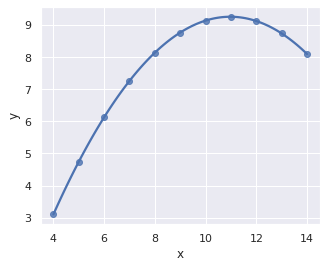

In [18]:
sns.regplot(
    x = "x",
    y = "y",
    data = df_2,
    ci = None,
    order = 2
)
plt.show()

En el grupo 3 se puede observar la presencia de un outlier. Por lo tanto, vamos a proceder a eliminarlo (aunque tengamos pocos datos, al ser solo un outlier reprsenta una fracción pequeña del total de observaciones), y a ajustar mediante una regresión lineal el resto de los datos.

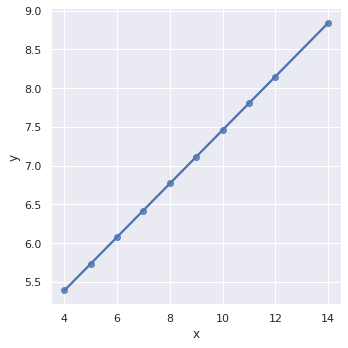

In [19]:
mask = lambda df_3: df_3["y"]!=df_3["y"].max()
df_3_corr = df_3[mask]
sns.lmplot(
    x='x',
    y='y',
    data=df_3_corr
) 
plt.show()

Por último, en el grupo 4 la mayoría de los datos tiene valores muy similares de x (de hecho, iguales), pero no así de y, lo que indica que las variables no tienen ninguna correlación (y por lo tanto ningún ajuste sería correcto). Para ver esto de mejor manera, ajustamos x en función de y y eliminamos el outlier presente en ese caso. El modelo esperado debería corresponder a una recta constante.

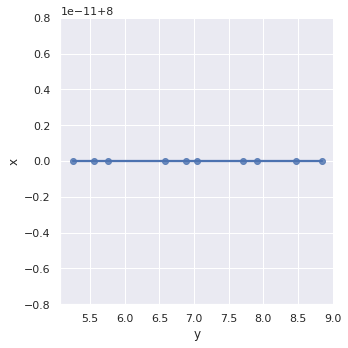

In [20]:
mask = lambda df_4: df_4["x"]!=df_4["x"].max()
df_4_corr = df_4[mask]
sns.lmplot(
    x='y',
    y='x',
    data=df_4_corr
) 
plt.show()